In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import textwrap
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

In [3]:
stock_names = ['ONCO', 'CNEY', 'TNXP', 'APLD', 'KTTA']

start_date = '2023-09-26'
end_date = '2024-09-26'

stocks = []

for stock in stock_names:
    data = yf.download(stock, start=start_date, end=end_date)
    
    ticker = yf.Ticker(stock)
    stock_info = ticker.info

    data['Industry'] = stock_info.get('industry', 'N/A')
    data['Sector'] = stock_info.get('sector', 'N/A')
    data['Marketcap'] = stock_info.get('marketCap', 'N/A')
    data['Peratio'] = stock_info.get('trailingPE', 'N/A')
    data['Divyield'] = stock_info.get('dividendYield', 'N/A')
    data['Fulltimeemployees'] = stock_info.get('fullTimeEmployees', 'N/A')
    data['Companyinfo'] = stock_info.get('longBusinessSummary', 'N/A')
    data['Ticker'] = stock
    data.reset_index(inplace=True)

    stocks.append(data)

df = pd.concat(stocks, ignore_index=True)
print(df.shape, df.head())

df.to_csv('stocks.csv', index=False)
df.shape

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


(1260, 15)         Date       Open       High        Low      Close  Adj Close  Volume  \
0 2023-09-26  24.160000  24.160000  20.200001  23.120001  23.120001    1413   
1 2023-09-27  22.400000  23.040001  22.000000  22.080000  22.080000     833   
2 2023-09-28  20.799999  23.040001  20.200001  21.160000  21.160000    3013   
3 2023-09-29  20.559999  21.639999  20.400000  20.480000  20.480000    1053   
4 2023-10-02  21.840000  21.840000  20.000000  20.719999  20.719999    1098   

        Industry      Sector  Marketcap Peratio Divyield  Fulltimeemployees  \
0  Biotechnology  Healthcare   38152952     N/A      N/A                 12   
1  Biotechnology  Healthcare   38152952     N/A      N/A                 12   
2  Biotechnology  Healthcare   38152952     N/A      N/A                 12   
3  Biotechnology  Healthcare   38152952     N/A      N/A                 12   
4  Biotechnology  Healthcare   38152952     N/A      N/A                 12   

                                       

(1260, 15)

In [4]:
df.rename(columns={'Adj Close': 'Adjclose'}, inplace=True) #my OCD of renaming columns w/o spaces

In [5]:
df.replace('N/A', None, inplace=True) #replace srings with nonetype
df.isna().any() #check for nones

Date                 False
Open                 False
High                 False
Low                  False
Close                False
Adjclose             False
Volume               False
Industry             False
Sector               False
Marketcap            False
Peratio               True
Divyield              True
Fulltimeemployees    False
Companyinfo          False
Ticker               False
dtype: bool

In [6]:
print(df.Peratio.isna().all(), df.Divyield.isna().all()) #check if all items are nones

True True


In [7]:
df=df.drop(columns=['Peratio', 'Divyield']) #drop these columns
df.head() 

,Date,Open,High,Low,Close,Adjclose,Volume,Industry,Sector,Marketcap,Fulltimeemployees,Companyinfo,Ticker
0,2023-09-26,24.160000,24.160000,20.200001,23.120001,23.120001,1413,Biotechnology,Healthcare,38152952,12,"Onconetix, Inc., a biotechnology company, focu...",ONCO
1,2023-09-27,22.400000,23.040001,22.000000,22.080000,22.080000,833,Biotechnology,Healthcare,38152952,12,"Onconetix, Inc., a biotechnology company, focu...",ONCO
2,2023-09-28,20.799999,23.040001,20.200001,21.160000,21.160000,3013,Biotechnology,Healthcare,38152952,12,"Onconetix, Inc., a biotechnology company, focu...",ONCO
3,2023-09-29,20.559999,21.639999,20.400000,20.480000,20.480000,1053,Biotechnology,Healthcare,38152952,12,"Onconetix, Inc., a biotechnology company, focu...",ONCO
4,2023-10-02,21.840000,21.840000,20.000000,20.719999,20.719999,1098,Biotechnology,Healthcare,38152952,12,"Onconetix, Inc., a biotechnology company, focu...",ONCO


In [8]:
df.dtypes

Date                 datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Adjclose                    float64
Volume                        int64
Industry                     object
Sector                       object
Marketcap                     int64
Fulltimeemployees             int64
Companyinfo                  object
Ticker                       object
dtype: object

In [9]:
print(df.Industry.unique())
print(df.Sector.unique())

['Biotechnology' 'Specialty Chemicals' 'Information Technology Services']
['Healthcare' 'Basic Materials' 'Technology']


In [11]:
industry_groups=df.groupby('Industry')['Ticker'].unique().reset_index()
print("\nStock Tickers by Industry:")
print(industry_groups)
sector_groups=df.groupby('Sector')['Ticker'].unique().reset_index()
print("\nStock Tickers by Sector:")
print(sector_groups)


Stock Tickers by Industry:
                          Industry              Ticker
0                    Biotechnology  [ONCO, TNXP, KTTA]
1  Information Technology Services              [APLD]
2              Specialty Chemicals              [CNEY]

Stock Tickers by Sector:
            Sector              Ticker
0  Basic Materials              [CNEY]
1       Healthcare  [ONCO, TNXP, KTTA]
2       Technology              [APLD]


In [12]:
df=df.sort_values(by=['Industry', 'Ticker']).reset_index(drop=True) #makes it easier to graph by clumping the same industry together

In [13]:
for i in range(5):
    print(textwrap.fill(df.Companyinfo.unique()[i], width=80)) #read company info
    print()

Pasithea Therapeutics Corp., a biotechnology company, engages in discovery,
research, and development of treatments for central nervous system disorders,
RASopathies, and other diseases. Its lead product candidate PAS-004, a next-
generation macrocyclic mitogen-activated protein kinase, or MEK inhibitor for
use in the treatment of a range of RASopathies, including neurofibromatosis type
1 oncology indications. The company intends to develop PAS-003, to treat
amyotrophic lateral sclerosis; and PAS-001, to treat schizophrenia. Pasithea
Therapeutics Corp. was incorporated in 2020 and is headquartered in Miami Beach,
Florida.

Onconetix, Inc., a biotechnology company, focuses on the research, development,
and commercialization of solutions for men's health and oncology. It offers
Entadfi, an FDA-approved, once daily pill that combines finasteride and
tadalafil for the treatment of benign prostatic hyperplasia; and Proclarix, an
in vitro protein-based blood diagnostic test for prostate canc

In [14]:
print(df.groupby(['Ticker', 'Industry']).Adjclose.describe()) #look at Adjclose values

                                        count      mean       std    min  \
Ticker Industry                                                            
APLD   Information Technology Services  252.0  4.879861  1.208095  2.390   
CNEY   Specialty Chemicals              252.0  1.378925  1.011493  0.280   
KTTA   Biotechnology                    252.0  6.548488  1.322316  3.845   
ONCO   Biotechnology                    252.0  8.192690  3.921512  2.960   
TNXP   Biotechnology                    252.0  8.220119  6.403125  0.130   

                                           25%    50%       75%        max  
Ticker Industry                                                             
APLD   Information Technology Services  4.1575  4.710   5.53750   8.520000  
CNEY   Specialty Chemicals              0.4875  1.145   1.89750   3.630000  
KTTA   Biotechnology                    5.5925  6.731   7.30425   9.600000  
ONCO   Biotechnology                    5.9100  6.680   8.77000  23.120001  
TNXP 

In [15]:
df[(df.Ticker == 'TNXP') & (df.Adjclose == df.Adjclose.max())] #look at max value

,Date,Open,High,Low,Close,Adjclose,Volume,Industry,Sector,Marketcap,Fulltimeemployees,Companyinfo,Ticker
504,2023-09-26,25.92,25.92,24.639999,25.280001,25.280001,8119,Biotechnology,Healthcare,18268306,103,"Tonix Pharmaceuticals Holding Corp., a biophar...",TNXP


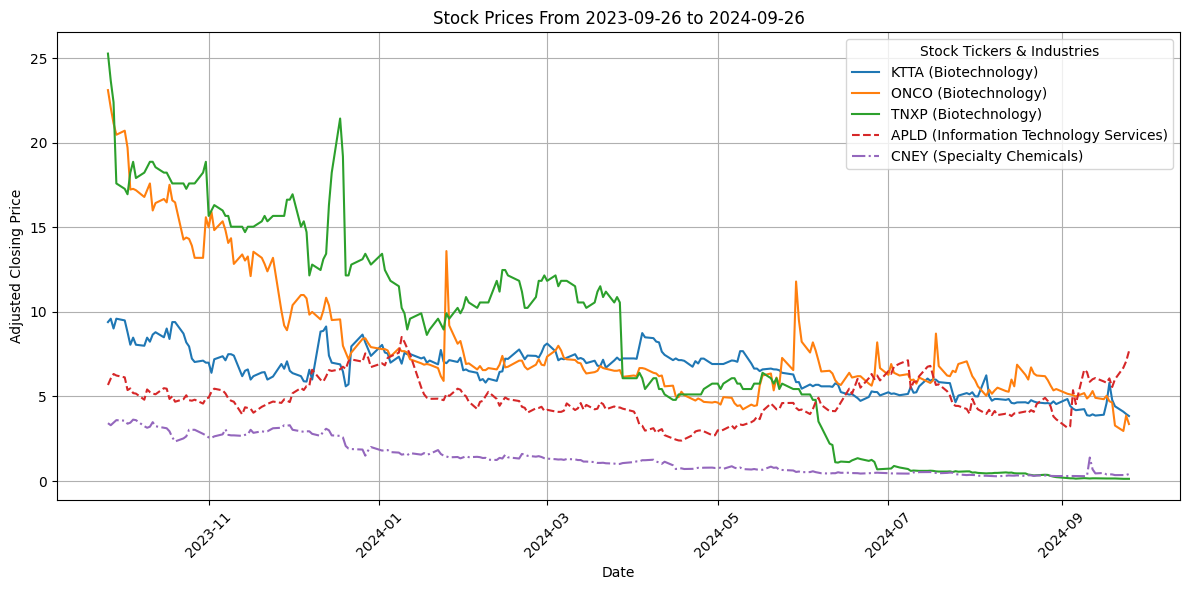

In [16]:
plt.figure(figsize=(12, 6))

# Get unique industries and define line styles
industries = df['Industry'].unique()
line_styles = ['-', '--', '-.', ':']  # Different line styles
style_map = {industry: line_styles[i % len(line_styles)] for i, industry in enumerate(industries)}

# Create a list to hold custom legend handles
legend_handles = []

# Loop through each ticker to plot
for ticker in df['Ticker'].unique():
    dfbyticker = df[df['Ticker'] == ticker]
    industry = dfbyticker['Industry'].iloc[0]  # Get the industry for the ticker
    line_style = style_map[industry]  # Get the line style for the industry
    
    # Plot the adjusted closing price
    line, = plt.plot(dfbyticker['Date'], dfbyticker['Adjclose'], 
                     label=ticker, 
                     linestyle=line_style)  # Apply the industry line style
    
    # Create a custom legend handle with the same color as the line
    legend_handles.append((industry, ticker, line.get_color(), line_style))  # Store as a tuple

# Create legend lines with appropriate colors (without sorting)
legend_lines = [mlines.Line2D([], [], color=color, linestyle=style, label=f'{ticker} ({industry})') 
                for industry, ticker, color, style in legend_handles]

plt.title(f'Stock Prices From {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.xticks(rotation=45)

# Add the custom legend with colored handles
plt.legend(handles=legend_lines, title='Stock Tickers & Industries')

plt.grid()
plt.tight_layout()
plt.show()